In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 线性回归
## 最小二乘法

In [0]:
import numpy as np
import pandas as pd
import random
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def real_func(X):
    return 0.22 * X[ : , 0] + 0.34 * X[ : , 1]  + 4.2  + np.random.normal(scale = 0.01, size = (len(X), ))

features = np.random.normal(scale  = 1, size = (1000, 2))
labels = real_func(features)

print(features.shape, labels.shape)

(1000, 2) (1000,)


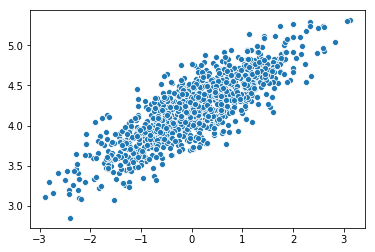

In [0]:
sns.scatterplot(x = features[ : , 1], y = labels)

In [0]:
def data_iter(batch_size, X, y):
    num_examples = len(X)
    indices = [i for i in range(num_examples)]
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i: min(i + batch_size, num_examples)]
        yield X[j], y[j]

for x, y in data_iter(10, features, labels):
    print(x.shape, y.shape )
    break

(10, 2) (10,)


In [0]:
W = np.random.normal(scale = 0.1, size = (2,1))
b = np.zeros(shape = (1, ))

print(W, b)

[[ 0.10235786]
 [-0.0219214 ]] [0.]


In [0]:
def  line_g(X, W, b):
    return np.dot(X, W) + b

In [0]:
def squared_loss(y, y_hat):
    return np.mean((y - y_hat) **2 / 2)

In [0]:
def deri(X, y, y_hat):
    deri_w = X.transpose().dot(y - y_hat.reshape(y.shape)) / len(X)
    deri_b = np.mean(y - y_hat.reshape(y.shape))
    return deri_w, deri_b #np.mean((y - y_hat.reshape(y.shape)) ** 2 / 2)

In [0]:
def sgd(W,b , deri_w, deri_b, lr):
    W -= deri_w * lr
    b -= deri_b * lr

In [0]:
lr = 0.005
batch_size = 10
num_epochs = 10

In [0]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        deri_w, deri_b  = deri(X, line_g(X, W, b), y)
        sgd(W,b, deri_w, deri_b, lr)
    train_l = squared_loss(labels, line_g(features, W, b))
    print('epoch {0}, loss is {1: .3f}, W is {2}, b is {3: .3f}'.format(epoch, train_l, W, float(b)))

epoch 0, loss is  0.168, W is [[0.21988949]
 [0.33986922]], b is  4.200
epoch 1, loss is  0.168, W is [[0.21989676]
 [0.33990938]], b is  4.200
epoch 2, loss is  0.168, W is [[0.21989687]
 [0.33991302]], b is  4.200
epoch 3, loss is  0.168, W is [[0.21990068]
 [0.33992121]], b is  4.200
epoch 4, loss is  0.168, W is [[0.21992355]
 [0.3399599 ]], b is  4.200
epoch 5, loss is  0.168, W is [[0.21991726]
 [0.33995567]], b is  4.200
epoch 6, loss is  0.168, W is [[0.21991092]
 [0.33996664]], b is  4.200
epoch 7, loss is  0.168, W is [[0.21994177]
 [0.33994791]], b is  4.200
epoch 8, loss is  0.168, W is [[0.2199476 ]
 [0.33995325]], b is  4.200
epoch 9, loss is  0.168, W is [[0.21993505]
 [0.3399202 ]], b is  4.200


## 逻辑回归

## Softmax